In [2]:
!pip install mmcv-full
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

     |████████████████████████████████| 309 kB 5.2 MB/s 
     |████████████████████████████████| 185 kB 42.7 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.12-cp37-cp37m-linux_x86_64.whl size=29259615 sha256=d36d451a1659a69c885065aee7c1a81196cca8b16911d79f364f5368ec6219c6
  Stored in directory: /root/.cache/pip/wheels/3a/a4/e1/61968a1aca1a84435171a4162f9a80872951c7b7ff0662ac87
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 20640, done.
remote: Total 20640 (delta 0), reused 0 (delta 0), pack-reused 20640
Receiving objects: 100% (20640/20640), 24.43 MiB | 22.18 MiB/s, done.
Resolving deltas: 100% (14456/14456), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCE

In [1]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [2]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2021-09-07 03:30:54--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  25.1MB/s    in 27s     

2021-09-07 03:31:22 (27.7 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2021-09-07 03:31:22--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  14.2MB/s    in 1.3s    

2021-09-07 03:31:24 (14.2 M

In [ ]:
!mkdir /content/data
!tar -xvf images.tar.gz -C /content/data
!tar -xvf annotations.tar.gz -C /content/data

In [ ]:
!ls -lia ./data/images/Abyss*.jpg

In [5]:
!ls -lia ./data/images

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
12901 -rwxr-xr-x 1 1001 1001   27987 Jun 18  2012 Egyptian_Mau_91.jpg
18610 -rwxr-xr-x 1 1001 1001   31662 Jun 18  2012 Egyptian_Mau_92.jpg
17632 -rwxr-xr-x 1 1001 1001   11833 Jun 18  2012 Egyptian_Mau_93.jpg
13879 -rwxr-xr-x 1 1001 1001   13282 Jun 18  2012 Egyptian_Mau_94.jpg
16619 -rwxr-xr-x 1 1001 1001   25425 Jun 18  2012 Egyptian_Mau_95.jpg
12066 -rwxr-xr-x 1 1001 1001   22833 Jun 18  2012 Egyptian_Mau_96.jpg
12395 -rwxr-xr-x 1 1001 1001  181499 Jun 18  2012 Egyptian_Mau_97.jpg
14670 -rwxr-xr-x 1 1001 1001    8709 Jun 18  2012 Egyptian_Mau_98.jpg
14876 -rwxr-xr-x 1 1001 1001   12394 Jun 18  2012 Egyptian_Mau_99.jpg
16331 -rwxr-xr-x 1 1001 1001   48984 Jun 18  2012 Egyptian_Mau_9.jpg
16472 -rwxr-xr-x 1 1001 1001  164254 Jun 18  2012 english_cocker_spaniel_100.jpg
14785 -rwxr-xr-x 1 1001 1001  170083 Jun 18  2012 english_cocker_spaniel_101.jpg
15380 -rwxr-xr-x 1 1001 1001  241519 Jun 18  2012 english_cocker_spaniel_102.jpg
14664 -rwxr-xr-x 1 100

In [ ]:
!cat /data/annotations/xmls/Abyssinian_1.xml

2621449 -rw-r--r-- 1 501 staff 493 Jun 29  2012 ./data/annotations/xmls/Abyssinian_1.xml


In [ ]:
!cat ./data/annotations/xmls/Abyssinian_104.xml

cat: ./data/annotations/xmls/Abyssinian_104.xml: No such file or directory


In [ ]:
import glob
import xml.etree.ElementTree as ET

def get_bboxes_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bbox_names = []
    bboxes = []

    for obj in root.findall('object'):
        bbox_name = obj.find('name').text
        
        xml_box = obj.find('bndbox')
        xmin = int(xml_box.find('xmin').text)
        ymin = int(xml_box.find('ymin').text)
        xmax = int(xml_box.find('xmax').text)
        ymax = int(xml_box.find('ymax').text)

        bbox_names.append(bbox_name)
        bboxes.append([xmin, ymin, xmax, ymax])

    return bbox_name, bboxes

get_bboxes_from_xml('./data/annotations/xmls/Abyssinian_1.xml')

('cat', [[333, 72, 425, 158]])

In [6]:
import pandas as pd
pet_df = pd.read_csv('./data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'etc2'])
pet_df.head()

,img_name,class_id,etc1,etc2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [7]:
pet_df['class_name'] = pet_df['img_name'].apply(lambda x: x[:x.rfind('_')])
pet_df.head()

,img_name,class_id,etc1,etc2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian


In [8]:
PET_CLASSES = pet_df['class_name'].unique().tolist()
PET_CLASSES

['Abyssinian',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'boxer',
 'British_Shorthair',
 'chihuahua',
 'Egyptian_Mau',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'Maine_Coon',
 'miniature_pinscher',
 'newfoundland',
 'Persian',
 'pomeranian',
 'pug',
 'Ragdoll',
 'Russian_Blue',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'Siamese',
 'Sphynx',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [9]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=2021)
train_df['class_id'].value_counts(), val_df['class_id'].value_counts()

(37    90
 22    90
 34    90
 32    90
 30    90
 28    90
 26    90
 24    90
 20    90
 35    90
 18    90
 16    90
 14    90
 10    90
 6     90
 4     90
 36    90
 1     90
 3     90
 19    90
 31    90
 29    90
 27    90
 25    90
 5     90
 21    90
 17    90
 15    90
 11    90
 9     90
 7     90
 2     90
 33    89
 23    87
 13    86
 8     86
 12    84
 Name: class_id, dtype: int64, 37    10
 36    10
 17    10
 16    10
 15    10
 14    10
 13    10
 11    10
 10    10
 9     10
 8     10
 7     10
 6     10
 5     10
 4     10
 3     10
 2     10
 18    10
 19    10
 20    10
 21    10
 35    10
 34    10
 33    10
 32    10
 31    10
 30    10
 29    10
 28    10
 27    10
 26    10
 25    10
 24    10
 22    10
 1     10
 12     9
 23     9
 Name: class_id, dtype: int64)

In [10]:
train_df = train_df.sort_values(by='img_name')
val_df = val_df.sort_values(by='img_name')
train_df['img_name'].to_csv('./data/train.txt', sep=' ', index=False, header=False)
val_df['img_name'].to_csv('./data/val.txt', sep=' ', index=False, header=False)

In [11]:
import glob
import xml.etree.ElementTree as ET

def get_bboxes_from_xml(anno_dir, xml_file):
    anno_xml_file = os.path.join(anno_dir, xml_file)
    tree = ET.parse(anno_xml_file)
    root = tree.getroot()
    bbox_names = []
    bboxes = []

    for obj in root.findall('object'):
        bbox_name = xml_file[:xml_file.rfind('_')]
        
        xml_box = obj.find('bndbox')
        xmin = int(xml_box.find('xmin').text)
        ymin = int(xml_box.find('ymin').text)
        xmax = int(xml_box.find('xmax').text)
        ymax = int(xml_box.find('ymax').text)

        bbox_names.append(bbox_name)
        bboxes.append([xmin, ymin, xmax, ymax])

    return bbox_names, bboxes

### mmdetection의 중립 annotation 포맷 변환
* CLASSES 는 pet_df의 'class_name' 컬럼에 unique 데이터로 지정. class id는 tuple(list)형의 CLASSES의 index값에 따라 설정. 
* ann_file로 입력되는 메타 파일을 읽어서 개별 image정보와 ann 정보를 dict로 생성하여 data_infos list에 입력
* 개별 XML 읽어서 ann 정보를 만드는 것은 get_bboxes_from_xml() 함수 이용. 
* 디버깅용으로 CustomDataset을 만들어서 미리 테스트 하는 방법도 고려. 

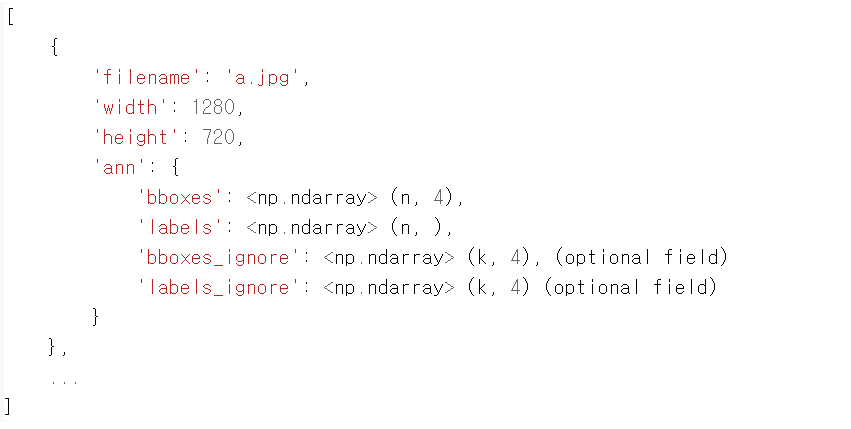

In [12]:
import copy
import os

import mmcv
import cv2
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

PET_CLASSES = pet_df['class_name'].unique().tolist()

@DATASETS.register_module(force=True)
class PetDataset(CustomDataset):
    CLASSES = PET_CLASSES

    def load_annotations(self, ann_file):
        label_dict = {k:i for i,k in enumerate(self.CLASSES)}
        image_list = mmcv.list_from_file(self.ann_file)

        data_infos = []
        for image_id in image_list:
            filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
            image = cv2.imread(filename)
            height, width = image.shape[:2]

            data_info = {
                'filename' : str(image_id) + '.jpg',
                'height' : height,
                'width' : width
            }

            label_prefix = self.img_prefix.replace('images', 'annotations')

            anno_xml_file = os.path.join(label_prefix, 'xmls/' +str(image_id)+'.xml')
            if not os.path.exists(anno_xml_file):
                continue
            anno_dir = os.path.join(label_prefix, 'xmls')
            bbox_names, bboxes = get_bboxes_from_xml(anno_dir, str(image_id)+'.xml')

            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []

            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in label_dict:
                    gt_bboxes.append(bbox)
                    gt_labels.append(label_dict[bbox_name])

                else:
                    gt_bboxes.append(bbox)
                    gt_labels.append(-1)

            data_anno = {
                'bboxes' : np.array(gt_bboxes, dtype=np.float32).reshape(-1,4),
                'labels' : np.array(gt_labels, dtype=np.long),
                'bboxes_ignore' : np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
                'labels_ignore' : np.array(gt_labels_ignore, dtype=np.long)
            }

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [13]:
!cd mmdetection; mkdir checkpoints
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-09-07 03:32:29--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  8.95MB/s    in 18s     

2021-09-07 03:32:48 (8.81 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [14]:
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
pwd

In [15]:
from mmcv import Config
cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [16]:
from mmdet.apis import set_random_seed

cfg.dataset_type = 'PetDataset'
cfg.data_root = '/content/data/'

cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/content/data/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'PetDataset'
cfg.data.val.data_root = '/content/data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

cfg.model.roi_head.bbox_head.num_classes = 37

cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

cfg.work_dir = '/content/drive/MyDrive'

cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 5
cfg.runner.max_epochs = 5

cfg.evaluation.metric = 'mAP'
cfg.evaluation.interval = 5
cfg.checkpoint_config.interval = 5

cfg.data.samples_per_gpu = 4

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

cfg.lr_config.policy='step'
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

In [17]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

datasets = [build_dataset(cfg.data.train)]

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/datasets/custom.py:157: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


In [ ]:
!pwd

In [18]:
%cd mmdetection
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))

train_detector(model, datasets, cfg, distributed=False, validate=True)

/content/mmdetection


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2021-09-07 03:33:29,641 - mmdet - INFO - load checkpoint from checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-09-07 03:33:29,643 - mmdet - INFO - Use load_from_local loader
2021-09-07 03:33:29,773 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 367/367, 2.8 task/s, elapsed: 132s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-09-07 07:03:42,338 - mmdet - INFO - 
+----------------------------+-----+------+--------+-------+
| class                      | gts | dets | recall | ap    |
+----------------------------+-----+------+--------+-------+
| Abyssinian                 | 10  | 75   | 1.000  | 0.390 |
| american_bulldog           | 10  | 65   | 0.900  | 0.703 |
| american_pit_bull_terrier  | 10  | 55   | 0.800  | 0.696 |
| basset_hound               | 10  | 56   | 1.000  | 0.851 |
| beagle                     | 10  | 79   | 0.900  | 0.602 |
| Bengal                     | 10  | 102  | 1.000  | 0.523 |
| Birman                     | 10  | 67   | 1.000  | 0.610 |
| Bombay                     | 10  | 85   | 0.900  | 0.823 |
| boxer                      | 10  | 104  | 1.000  | 0.438 |
| British_Shorthair          | 10  | 56   | 1.000  | 0.808 |
| chihuahua                  | 10  | 41   | 0.800  | 0.571 |
| Egyptian_Mau               | 9   | 52   | 0.889  | 0.451 |
| english_cocker_spaniel     | 10  | 52   |

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('/content/data/images/Abyssinian_88.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)

In [ ]:
# 아래는 오류를 발생시킵니다. 현재 Customized학습된 모델의 inference시 image file로 인자가 주어졌을때 inference 오류 발생. 
img_path = '/content/data/images/Abyssinian_88.jpg'

model.cfg = cfg

result = inference_detector(model, img_path)
show_result_pyplot(model, img, result, score_thr=0.3)

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


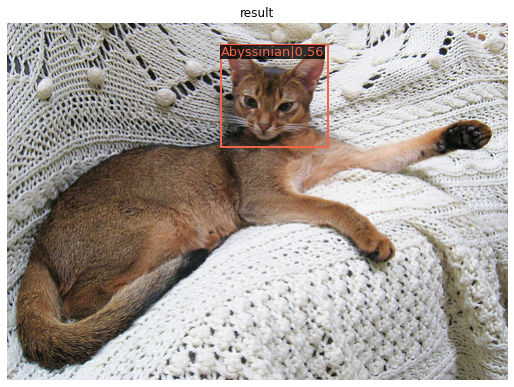

In [19]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/Computer Vision/MMDetection의 이해와 Faster RCNN 적용 실습/models/epoch_5.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# BGR Image 사용 
img = cv2.imread('/content/data/images/Abyssinian_88.jpg')
#model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.3)